# Classification Model:

## CNN (Convolutional Neural Network)
- Ryan Nicholas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
train_data = 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\'
test_data = 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_test\\asl_alphabet_test\\'

letters = ['A', 'B', 'C']

In [3]:
train_dirs = []
for i in letters:
    train_letter = train_data + str(i) + '\\'
    train_dirs.append(train_letter)

In [4]:
train_dirs

['C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\A\\',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\B\\',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\C\\']

In [5]:
from os import listdir
from os.path import isfile, join


x_train = {}

for i in range(len(train_dirs)):
    d = train_dirs[i]
    l = letters[i]
    files = [join(d, f) for f in listdir(d) if isfile(join(d, f))]
    x_train[l] = files
    

In [6]:
len(x_train['C'])

3000

In [7]:
df_pics = pd.DataFrame(x_train)
df_pics

,A,B,C
0,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
1,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
2,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
3,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
4,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
...,...,...,...
2995,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
2996,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
2997,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...
2998,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...


In [8]:
import cv2

def convert_img(filename):
        img_data = cv2.imread(filename, 0)
        return img_data

In [9]:
a = convert_img(df_pics.A[0])

In [10]:
a.max()

201

In [11]:
data = {}

cols = df_pics.columns

cols

Index(['A', 'B', 'C'], dtype='object')

In [12]:
for i in cols:
    convert_vals = np.array(list(map(lambda x: convert_img(x) / 255.0, df_pics[i])))
    data[i] = convert_vals

In [13]:
clean_data1 = data['A'].reshape((3000, -1))
output = [0] * 3000
clean_data2 = data['B'].reshape((3000, -1))
output2 = [1] * 3000
output = output + output2
clean_data3 = data['C'].reshape((3000, -1))
output3 = [2] * 3000
output = output + output3

In [14]:
clean_data = np.array(list(clean_data1) + list(clean_data2) + list(clean_data3))
clean_data.shape

(9000, 40000)

In [15]:
df = pd.DataFrame(clean_data)
df

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.117647,0.109804,0.121569,0.105882,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.109804,0.109804,0.105882,0.109804,0.113725,0.117647,0.113725,0.113725,0.125490,0.105882
1,0.117647,0.109804,0.113725,0.113725,0.105882,0.113725,0.113725,0.113725,0.113725,0.109804,...,0.113725,0.109804,0.105882,0.109804,0.121569,0.113725,0.109804,0.117647,0.117647,0.113725
2,0.121569,0.105882,0.117647,0.109804,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,...,0.113725,0.109804,0.109804,0.101961,0.117647,0.117647,0.109804,0.113725,0.117647,0.113725
3,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.113725,0.109804,0.121569,0.113725,0.105882,0.117647,0.117647,0.109804
4,0.113725,0.117647,0.101961,0.117647,0.113725,0.121569,0.109804,0.109804,0.113725,0.113725,...,0.113725,0.117647,0.113725,0.098039,0.121569,0.113725,0.113725,0.109804,0.113725,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.113725,0.113725,0.113725,0.117647,0.109804,0.121569,0.105882,0.113725,0.109804,0.113725,...,0.113725,0.113725,0.117647,0.109804,0.113725,0.117647,0.113725,0.113725,0.109804,0.117647
8996,0.113725,0.113725,0.113725,0.113725,0.105882,0.121569,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.113725,0.121569,0.109804,0.109804,0.113725,0.117647,0.105882,0.113725,0.117647
8997,0.109804,0.121569,0.109804,0.121569,0.109804,0.117647,0.113725,0.113725,0.117647,0.113725,...,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.105882,0.117647,0.117647
8998,0.113725,0.121569,0.105882,0.121569,0.113725,0.117647,0.117647,0.113725,0.113725,0.117647,...,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.109804


In [16]:
output = np.array(output)
output.shape

(9000,)

In [17]:
df['Classes'] = output

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Classes
0,0.117647,0.109804,0.121569,0.105882,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.109804,0.105882,0.109804,0.113725,0.117647,0.113725,0.113725,0.125490,0.105882,0
1,0.117647,0.109804,0.113725,0.113725,0.105882,0.113725,0.113725,0.113725,0.113725,0.109804,...,0.109804,0.105882,0.109804,0.121569,0.113725,0.109804,0.117647,0.117647,0.113725,0
2,0.121569,0.105882,0.117647,0.109804,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,...,0.109804,0.109804,0.101961,0.117647,0.117647,0.109804,0.113725,0.117647,0.113725,0
3,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.109804,0.121569,0.113725,0.105882,0.117647,0.117647,0.109804,0
4,0.113725,0.117647,0.101961,0.117647,0.113725,0.121569,0.109804,0.109804,0.113725,0.113725,...,0.117647,0.113725,0.098039,0.121569,0.113725,0.113725,0.109804,0.113725,0.117647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.113725,0.113725,0.113725,0.117647,0.109804,0.121569,0.105882,0.113725,0.109804,0.113725,...,0.113725,0.117647,0.109804,0.113725,0.117647,0.113725,0.113725,0.109804,0.117647,2
8996,0.113725,0.113725,0.113725,0.113725,0.105882,0.121569,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.121569,0.109804,0.109804,0.113725,0.117647,0.105882,0.113725,0.117647,2
8997,0.109804,0.121569,0.109804,0.121569,0.109804,0.117647,0.113725,0.113725,0.117647,0.113725,...,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.105882,0.117647,0.117647,2
8998,0.113725,0.121569,0.105882,0.121569,0.113725,0.117647,0.117647,0.113725,0.113725,0.117647,...,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.109804,2


In [19]:
df

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Classes
0,0.117647,0.109804,0.121569,0.105882,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.109804,0.105882,0.109804,0.113725,0.117647,0.113725,0.113725,0.125490,0.105882,0
1,0.117647,0.109804,0.113725,0.113725,0.105882,0.113725,0.113725,0.113725,0.113725,0.109804,...,0.109804,0.105882,0.109804,0.121569,0.113725,0.109804,0.117647,0.117647,0.113725,0
2,0.121569,0.105882,0.117647,0.109804,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,...,0.109804,0.109804,0.101961,0.117647,0.117647,0.109804,0.113725,0.117647,0.113725,0
3,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.109804,0.121569,0.113725,0.105882,0.117647,0.117647,0.109804,0
4,0.113725,0.117647,0.101961,0.117647,0.113725,0.121569,0.109804,0.109804,0.113725,0.113725,...,0.117647,0.113725,0.098039,0.121569,0.113725,0.113725,0.109804,0.113725,0.117647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.113725,0.113725,0.113725,0.117647,0.109804,0.121569,0.105882,0.113725,0.109804,0.113725,...,0.113725,0.117647,0.109804,0.113725,0.117647,0.113725,0.113725,0.109804,0.117647,2
8996,0.113725,0.113725,0.113725,0.113725,0.105882,0.121569,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.121569,0.109804,0.109804,0.113725,0.117647,0.105882,0.113725,0.117647,2
8997,0.109804,0.121569,0.109804,0.121569,0.109804,0.117647,0.113725,0.113725,0.117647,0.113725,...,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.105882,0.117647,0.117647,2
8998,0.113725,0.121569,0.105882,0.121569,0.113725,0.117647,0.117647,0.113725,0.113725,0.117647,...,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.109804,2


In [20]:
x = df.iloc[:, 0:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.117647,0.109804,0.121569,0.105882,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.109804,0.109804,0.105882,0.109804,0.113725,0.117647,0.113725,0.113725,0.125490,0.105882
1,0.117647,0.109804,0.113725,0.113725,0.105882,0.113725,0.113725,0.113725,0.113725,0.109804,...,0.113725,0.109804,0.105882,0.109804,0.121569,0.113725,0.109804,0.117647,0.117647,0.113725
2,0.121569,0.105882,0.117647,0.109804,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,...,0.113725,0.109804,0.109804,0.101961,0.117647,0.117647,0.109804,0.113725,0.117647,0.113725
3,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.113725,0.109804,0.121569,0.113725,0.105882,0.117647,0.117647,0.109804
4,0.113725,0.117647,0.101961,0.117647,0.113725,0.121569,0.109804,0.109804,0.113725,0.113725,...,0.113725,0.117647,0.113725,0.098039,0.121569,0.113725,0.113725,0.109804,0.113725,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.113725,0.113725,0.113725,0.117647,0.109804,0.121569,0.105882,0.113725,0.109804,0.113725,...,0.113725,0.113725,0.117647,0.109804,0.113725,0.117647,0.113725,0.113725,0.109804,0.117647
8996,0.113725,0.113725,0.113725,0.113725,0.105882,0.121569,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.113725,0.121569,0.109804,0.109804,0.113725,0.117647,0.105882,0.113725,0.117647
8997,0.109804,0.121569,0.109804,0.121569,0.109804,0.117647,0.113725,0.113725,0.117647,0.113725,...,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.105882,0.117647,0.117647
8998,0.113725,0.121569,0.105882,0.121569,0.113725,0.117647,0.117647,0.113725,0.113725,0.117647,...,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.109804


In [21]:
y = df.Classes
y

0       0
1       0
2       0
3       0
4       0
       ..
8995    2
8996    2
8997    2
8998    2
8999    2
Name: Classes, Length: 9000, dtype: int32

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [23]:
model.fit(x, y)

MultinomialNB()

In [24]:
pred = model.predict(x)

train_acc = np.mean(pred == y)
train_acc

0.5163333333333333

In [25]:
from tensorflow.keras import layers
model = tf.keras.Sequential()

# add the hidden layers to the CNN
model.add(layers.Conv2D(64, 3, activation='relu', input_shape=(200, 200, 1)))  # hidden layers
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 1, activation='relu'))  # more layers ...
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 1, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # get the softmax



In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [27]:
x = np.array(x).reshape((9000, 200, 200, 1))
x

array([[[[0.11764706],
         [0.10980392],
         [0.12156863],
         ...,
         [0.10980392],
         [0.1254902 ],
         [0.10196078]],

        [[0.11372549],
         [0.10980392],
         [0.1254902 ],
         ...,
         [0.12156863],
         [0.10196078],
         [0.13333333]],

        [[0.10588235],
         [0.12156863],
         [0.18431373],
         ...,
         [0.72941176],
         [0.71372549],
         [0.10196078]],

        ...,

        [[0.1254902 ],
         [0.09803922],
         [0.55686275],
         ...,
         [0.5372549 ],
         [0.54509804],
         [0.10588235]],

        [[0.10980392],
         [0.12156863],
         [0.54117647],
         ...,
         [0.54901961],
         [0.51372549],
         [0.1254902 ]],

        [[0.10980392],
         [0.11764706],
         [0.10980392],
         ...,
         [0.11372549],
         [0.1254902 ],
         [0.10588235]]],


       [[[0.11764706],
         [0.10980392],
         [0.11

In [28]:
model.fit(x, y, epochs=10)

Epoch 1/10
282/282 [==============================] - 18s 26ms/step - loss: 0.5527 - accuracy: 0.7586
Epoch 2/10
282/282 [==============================] - 7s 26ms/step - loss: 0.1522 - accuracy: 0.9457
Epoch 3/10
282/282 [==============================] - 7s 26ms/step - loss: 0.0695 - accuracy: 0.9760
Epoch 4/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0405 - accuracy: 0.9861
Epoch 5/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 6/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 7/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0272 - accuracy: 0.9910
Epoch 8/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
282/282 [==============================] - 7s 25ms/step - loss: 8.0761e-04 - accuracy: 0.9999
Epoch 10/10
282/282 [==============================] - 7s 25ms/step - loss: 0.0282 - a

In [29]:
pred = model.predict(x)

pred.shape

(9000, 3)

In [30]:
p = np.argmax(pred, axis=1)
p.shape

(9000,)

In [31]:
np.mean(p == y)

0.9977777777777778

In [32]:
test_dir = []
for i in letters:
    test_letter = test_data + str(i) + '\\'
    test_dir.append(test_letter)

In [33]:
from os import listdir
from os.path import isfile, join


x_test = {}

for i in range(len(test_dir)):
    d = test_dir[i]
    l = letters[i]
    files = [join(d, f) for f in listdir(d) if isfile(join(d, f))]
    x_test[l] = files
    

In [34]:
df_pics_test = pd.DataFrame(x_test)
df_pics_test

,A,B,C
0,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...,C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTr...


In [35]:
data_test = {}

cols = df_pics.columns

cols

Index(['A', 'B', 'C'], dtype='object')

In [36]:
for i in cols:
    convert_vals = np.array(list(map(lambda x: convert_img(x) / 255.0, df_pics_test[i])))
    data_test[i] = convert_vals
data_test

{'A': array([[[0.11764706, 0.10588235, 0.11372549, ..., 0.10588235,
          0.11372549, 0.12156863],
         [0.11764706, 0.11764706, 0.12156863, ..., 0.12156863,
          0.10196078, 0.10980392],
         [0.09803922, 0.1254902 , 0.35294118, ..., 0.48235294,
          0.50196078, 0.11764706],
         ...,
         [0.10196078, 0.10980392, 0.30196078, ..., 0.51764706,
          0.54509804, 0.10980392],
         [0.10980392, 0.14117647, 0.2745098 , ..., 0.54509804,
          0.52156863, 0.12156863],
         [0.11764706, 0.10588235, 0.10980392, ..., 0.10196078,
          0.12941176, 0.10588235]]]),
 'B': array([[[0.11764706, 0.10980392, 0.10980392, ..., 0.10980392,
          0.12156863, 0.10980392],
         [0.11372549, 0.10588235, 0.1254902 , ..., 0.11372549,
          0.10588235, 0.11372549],
         [0.10588235, 0.11764706, 0.19215686, ..., 0.72941176,
          0.71372549, 0.12156863],
         ...,
         [0.12156863, 0.09803922, 0.56470588, ..., 0.54117647,
          0.56

In [37]:
clean_data1 = data_test['A'].reshape((1, -1))
output_test = [0]
clean_data2 = data_test['B'].reshape((1, -1))
output2 = [1]
output_test = output_test + output2
clean_data3 = data_test['C'].reshape((1, -1))
output3 = [2]
output_test = output_test + output3
output_test

[0, 1, 2]

In [38]:
clean_data_test = np.array(list(clean_data1) + list(clean_data2) + list(clean_data3))
clean_data_test.shape

(3, 40000)

In [39]:
df_test = pd.DataFrame(clean_data_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.117647,0.105882,0.113725,0.109804,0.113725,0.121569,0.117647,0.113725,0.113725,0.109804,...,0.113725,0.109804,0.101961,0.113725,0.109804,0.121569,0.109804,0.101961,0.129412,0.105882
1,0.117647,0.109804,0.109804,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.109804,0.113725,0.109804,0.121569,0.105882,0.117647,0.117647,0.109804
2,0.109804,0.121569,0.105882,0.117647,0.129412,0.101961,0.121569,0.109804,0.113725,0.113725,...,0.113725,0.113725,0.113725,0.109804,0.113725,0.109804,0.113725,0.109804,0.129412,0.105882


In [40]:
df_test['Class'] = output_test
df_test

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Class
0,0.117647,0.105882,0.113725,0.109804,0.113725,0.121569,0.117647,0.113725,0.113725,0.109804,...,0.109804,0.101961,0.113725,0.109804,0.121569,0.109804,0.101961,0.129412,0.105882,0
1,0.117647,0.109804,0.109804,0.109804,0.113725,0.113725,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.109804,0.113725,0.109804,0.121569,0.105882,0.117647,0.117647,0.109804,1
2,0.109804,0.121569,0.105882,0.117647,0.129412,0.101961,0.121569,0.109804,0.113725,0.113725,...,0.113725,0.113725,0.109804,0.113725,0.109804,0.113725,0.109804,0.129412,0.105882,2


In [41]:
x_test = df_test.iloc[:, 0:-1]
x_test.shape

(3, 40000)

In [42]:
x_test = np.array(x_test).reshape((-1, 200, 200 ,1))
x_test.shape

(3, 200, 200, 1)

In [43]:
y_test = df_test.Class
y_test.shape

(3,)

In [44]:
p = model.predict(x_test)
p = np.argmax(p, axis=1)
p.shape

(3,)

In [45]:
np.mean(p == y_test)

1.0

In [46]:
# model.save_weights('cnn.h5')

In [47]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow as tf

def load_model():
    m = keras.Sequential()
    # add the hidden layers to the CNN
    m.add(layers.Conv2D(64, 3, activation='relu', input_shape=(200, 200, 1)))  # hidden layers
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Conv2D(64, 1, activation='relu'))  # more layers ...
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Conv2D(64, 1, activation='relu'))
    m.add(layers.Dropout(0.1))
    m.add(layers.Flatten())
    m.add(layers.Dense(64, activation='relu'))
    m.add(layers.Dense(32, activation='relu'))
    m.add(layers.Dense(3, activation='softmax'))  # get the softmax
    
    m.load_weights('cnn.h5')
    return m

In [48]:
loaded_model = load_model()

In [49]:
pred = loaded_model.predict(x)
p = np.argmax(pred, axis=1)
p.shape

(9000,)

In [50]:
np.mean(p == y)

0.9988888888888889

# R-CNN (Regional Convolutional Neural Network)
- Add the ability to detect the location of the hand 

In [198]:
def get_blur_thresh(img):
    i = cv2.imread(img, 0)
    blur = cv2.GaussianBlur(i, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    return blur, thresh

In [199]:
def get_contours(threshold):
    # Find contours
    ROI_number = 0
    cnts = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    return cnts

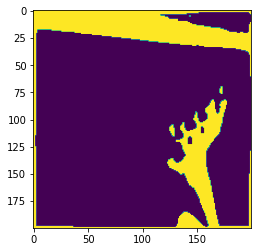

In [200]:
for i in df_pics.A:
    b, t = get_blur_thresh(i)
    c = get_contours(t)

plt.imshow(t)

In [106]:
annotations = train_data + 'annotations\\'
annotations

'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\'

In [107]:
annotate_files = [join(annotations, f) for f in listdir(annotations) if isfile(join(annotations, f))]
annotate_files

['C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A1.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A1479.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A1480.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A2.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A2445.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A2449.xml',
 'C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\annotations\\A2572.xml',
 'C:\

In [108]:
len(annotate_files)

30

In [109]:
from bs4 import BeautifulSoup

xml_data = []

for i in annotate_files:
    with open(i, 'r') as f:
        xml_d = f.read()
        xml_data.append(xml_d)
xml_data[0]

'<annotation>\n\t<folder>A</folder>\n\t<filename>A1.jpg</filename>\n\t<path>C:\\Users\\ry12n\\OneDrive\\Documents\\GitHub\\ASLTranslator\\asl-alphabet\\asl_alphabet_train\\asl_alphabet_train\\A\\A1.jpg</path>\n\t<source>\n\t\t<database>Unknown</database>\n\t</source>\n\t<size>\n\t\t<width>200</width>\n\t\t<height>200</height>\n\t\t<depth>3</depth>\n\t</size>\n\t<segmented>0</segmented>\n\t<object>\n\t\t<name>A</name>\n\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n\t\t<bndbox>\n\t\t\t<xmin>47</xmin>\n\t\t\t<ymin>30</ymin>\n\t\t\t<xmax>149</xmax>\n\t\t\t<ymax>121</ymax>\n\t\t</bndbox>\n\t</object>\n</annotation>\n'

In [112]:
bs_data = list(map(lambda x: BeautifulSoup(x, 'xml'), xml_data))
bs_data

[<?xml version="1.0" encoding="utf-8"?>
 <annotation>
 <folder>A</folder>
 <filename>A1.jpg</filename>
 <path>C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A1.jpg</path>
 <source>
 <database>Unknown</database>
 </source>
 <size>
 <width>200</width>
 <height>200</height>
 <depth>3</depth>
 </size>
 <segmented>0</segmented>
 <object>
 <name>A</name>
 <pose>Unspecified</pose>
 <truncated>0</truncated>
 <difficult>0</difficult>
 <bndbox>
 <xmin>47</xmin>
 <ymin>30</ymin>
 <xmax>149</xmax>
 <ymax>121</ymax>
 </bndbox>
 </object>
 </annotation>,
 <?xml version="1.0" encoding="utf-8"?>
 <annotation>
 <folder>A</folder>
 <filename>A1479.jpg</filename>
 <path>C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A1479.jpg</path>
 <source>
 <database>Unknown</database>
 </source>
 <size>
 <width>200</width>
 <height>200</height>
 <depth>3</depth>
 </size>
 <segmented>0</segmented>


In [153]:
x_min = {}
x_max = {}
y_min = {}
y_max = {}
files = []
labels = []

In [154]:
for i in bs_data:
    min_x = int(i.find('xmin').text)
    max_x = int(i.find('xmax').text)
    min_y = int(i.find('ymin').text)
    max_y = int(i.find('ymax').text)
    file_path = i.find('path').text
    lbl = i.find('name').text
    files.append(file_path)
    x_min[file_path] = min_x
    y_min[file_path] = min_y
    x_max[file_path] = max_x
    y_max[file_path] = max_y
    labels.append(lbl)
    
    

In [164]:
f_index = 0
a, b = (x_min[files[f_index]], y_min[files[f_index]]), (x_max[files[f_index]], y_max[files[f_index]])
a, b

((47, 30), (149, 121))

In [163]:
from torchvision.models.detection.transform import GeneralizedRCNNTransform
transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

<ipython-input-173-bf8114bd27d2>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


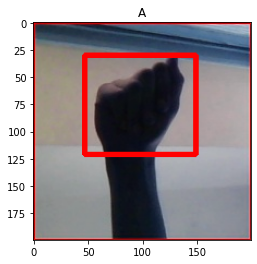

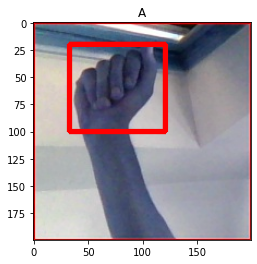

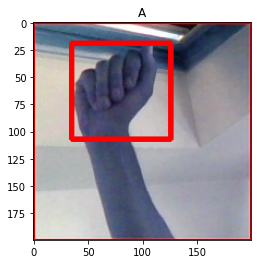

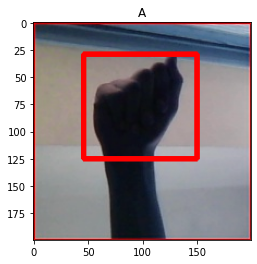

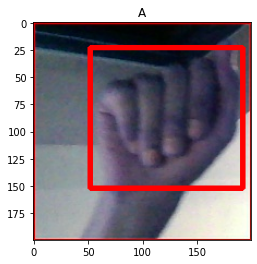

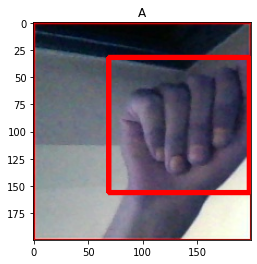

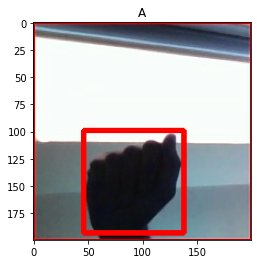

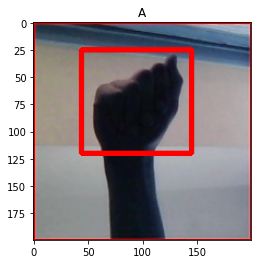

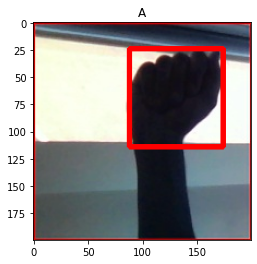

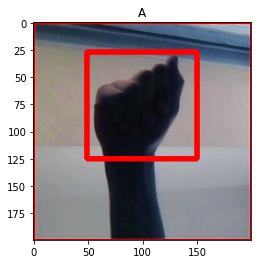

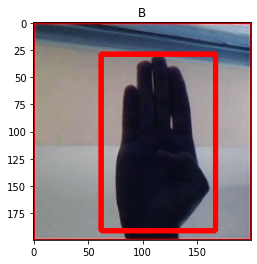

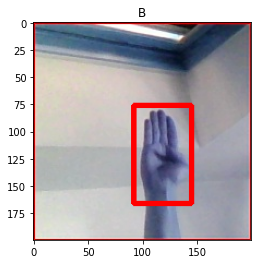

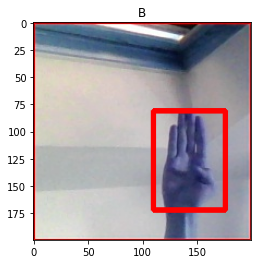

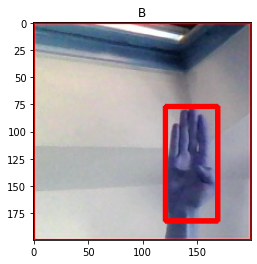

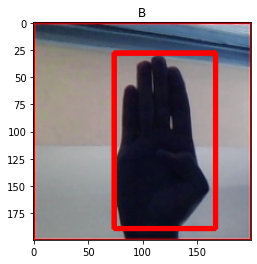

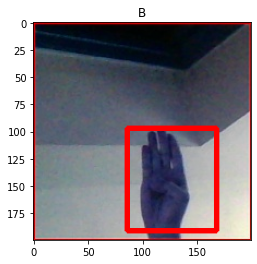

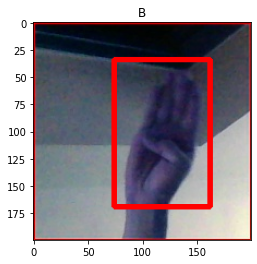

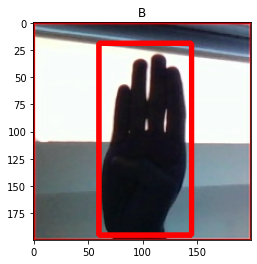

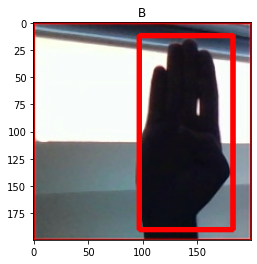

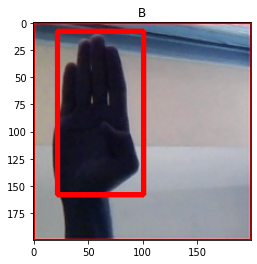

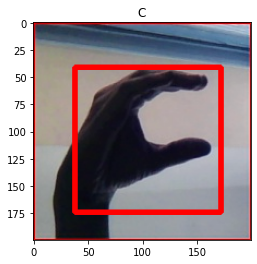

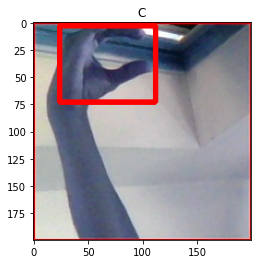

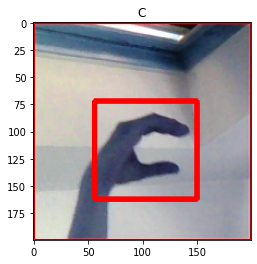

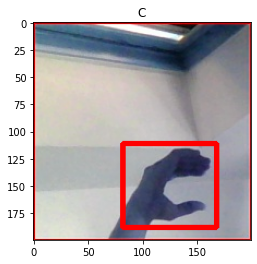

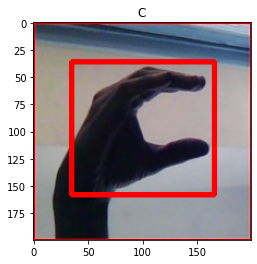

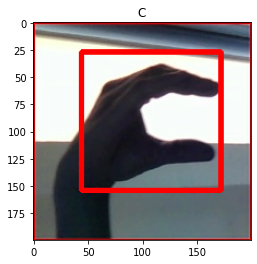

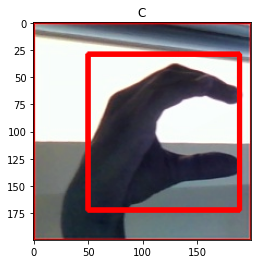

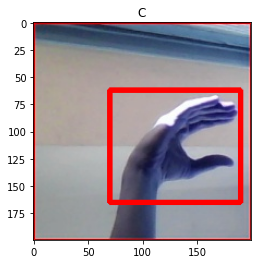

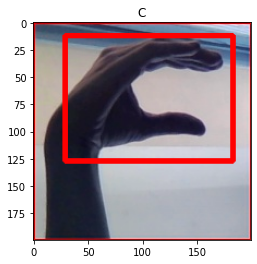

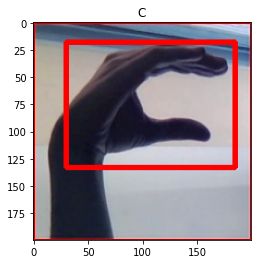

In [173]:
for i in range(len(files)):
    f_index = i
    a, b = (x_min[files[f_index]], y_min[files[f_index]]), (x_max[files[f_index]], y_max[files[f_index]])
    img_rec = cv2.imread(files[f_index])
    cv2.rectangle(img_rec, a, b, (255, 0, 0), 3)
    plt.figure()
    plt.title(labels[f_index])
    plt.imshow(img_rec)

In [201]:
related_data = np.zeros((9000,))


In [218]:
related_files = {}
related_index_files = {}
for i in files:
    loc = i.find('.jpg')
    start_loc = i.find('asl_alphabet_train\\asl_alphabet_train\\')
    init_start = 'asl_alphabet_train\\asl_alphabet_train\\A\\'
    start_loc = start_loc + len(init_start)
    val = i[start_loc:loc]
    letter_val = val[0]
    number_val = val[1:]
    ascii_index = ord(letter_val) - 65
    st_index = (ascii_index * 3000) + int(number_val) - 1
    related_data[st_index] = 1
    related_files[i] = st_index
    related_index_files[st_index] = i

In [219]:
x_shape = df.loc[related_data == 1].iloc[:, :-1]
x_shape

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.117647,0.109804,0.121569,0.105882,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.109804,0.109804,0.105882,0.109804,0.113725,0.117647,0.113725,0.113725,0.125490,0.105882
1,0.117647,0.109804,0.113725,0.113725,0.105882,0.113725,0.113725,0.113725,0.113725,0.109804,...,0.113725,0.109804,0.105882,0.109804,0.121569,0.113725,0.109804,0.117647,0.117647,0.113725
2,0.121569,0.105882,0.117647,0.109804,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,...,0.113725,0.109804,0.109804,0.101961,0.117647,0.117647,0.109804,0.113725,0.117647,0.113725
3,0.113725,0.109804,0.113725,0.113725,0.117647,0.109804,0.117647,0.109804,0.113725,0.109804,...,0.113725,0.113725,0.113725,0.109804,0.121569,0.113725,0.105882,0.117647,0.117647,0.109804
1478,0.105882,0.117647,0.113725,0.125490,0.113725,0.117647,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.109804,0.109804,0.125490,0.109804,0.113725,0.117647,0.113725,0.109804,0.117647
1479,0.117647,0.109804,0.109804,0.117647,0.113725,0.105882,0.121569,0.105882,0.113725,0.113725,...,0.109804,0.113725,0.109804,0.121569,0.121569,0.105882,0.121569,0.109804,0.113725,0.113725
2444,0.113725,0.109804,0.121569,0.109804,0.121569,0.117647,0.105882,0.105882,0.113725,0.113725,...,0.113725,0.113725,0.109804,0.105882,0.121569,0.117647,0.109804,0.117647,0.113725,0.105882
2448,0.121569,0.101961,0.117647,0.113725,0.117647,0.117647,0.109804,0.113725,0.113725,0.113725,...,0.113725,0.113725,0.105882,0.109804,0.117647,0.121569,0.101961,0.121569,0.113725,0.109804
2571,0.117647,0.113725,0.113725,0.113725,0.109804,0.113725,0.113725,0.117647,0.113725,0.113725,...,0.113725,0.113725,0.117647,0.109804,0.117647,0.117647,0.109804,0.109804,0.113725,0.109804
2999,0.113725,0.121569,0.109804,0.113725,0.113725,0.117647,0.113725,0.113725,0.113725,0.113725,...,0.113725,0.113725,0.117647,0.098039,0.125490,0.113725,0.109804,0.113725,0.117647,0.109804


# Theoretical Way to Find Location Quickly:
- SVM

In [269]:
from sklearn import svm

regr = svm.SVR(kernel='linear', C=1, gamma=0.5)

tr_x = [[4, 4, 4], [2, 2, 2], [1, 1, 1]]
tr_y = [4, 2, 1]

regr.fit(tr_x, tr_y)

SVR(C=1, gamma=0.5, kernel='linear')

In [270]:
p = regr.predict(tr_x)
p = np.array(list(map(lambda x: round(x), p)))
p

array([4, 2, 1])

In [274]:
p = regr.predict([[3, 3, 3]])
p = np.array(list(map(lambda x: round(x), p)))
p

array([3])

In [259]:
for i in x_min.keys():
    print(i)

C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A1.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A1479.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A1480.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A2.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A2445.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A2449.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A2572.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A\A3.jpg
C:\Users\ry12n\OneDrive\Documents\GitHub\ASLTranslator\asl-alphab